In [3]:
import pandas as pd
from pathlib import Path
Path.cwd()

PosixPath('/Users/audioworkstation/Documents/WORKSPACE/LEARNING/pd-training/src/pandas_series')

In [4]:
missing_vals = ["NA", "Missing", "Unknown"]
frame = pd.read_csv('resources/survey_results_public.csv', index_col="Respondent", na_values=missing_vals) # replaces mising_vals with the np.nan
pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 200)



In [27]:
# frame.shape
# frame.info()
# frame.head(1)

In [29]:
schema_frame = pd.read_csv('resources/survey_results_schema.csv', index_col="Column")
pd.set_option('display.max_rows', 85)

In [121]:
# schema_frame.shape
# schema_frame.info()
# schema_frame.head()

In [122]:
# Now we can search on `Column` column with loc function, because the default index is changed.
# (first parameter is for row filter aand second one is for column name)
schema_frame.loc["Respondent", "QuestionText"] 

In [ ]:
# What is a dataframe?
# They are a simple schema over a table with concists of rows and columns
# It is also something like a dictionary with list items BUT with a large number of added functionalities.
# DataFrames are rows and columns and Series are the rows of the columns.

In [ ]:
frame[["Respondent", "Hobbyist"]]

In [ ]:
frame.iloc[1000:1010] # Integer location of a row

In [ ]:
frame.iloc[[1000,1001, 1002], [1,2]] # Integer location of the rows and special columns

In [ ]:
frame.loc[1000:1005, ["MainBranch","Hobbyist"]] # Integer location (as deafault indexes) of the rows and special columns using loc

In [ ]:
frame["Hobbyist"].value_counts()

In [ ]:
frame.loc[1000:1005, "MainBranch":"Country"] # Define column range

In [40]:
# Indexes are not forced to be unique for pandas
# But it would have better performance if we create it on unique columns
# Indexes are labels for rows
# frame.set_index("Respondent", inplace=True) # With inplace=True set the current index as a default index
# frame.index
# frame
# frame.loc[1] # Now it is using `Respondent` columns as index and search in this column for value `1`
# frame.reset_index(inplace=True)
# schema_frame.sort_index(ascending=False, inplace=True) # inplace=True makes this descending order for index permanent

In [123]:
countries_filter = frame["Country"].isin(["United States", "Iran", "Germany"])
age_filter = frame["Age1stCode"] == "29"
pythonist_filter = frame["LanguageWorkedWith"].str.contains("Python", na=False) == True # na=False means exclude rows with NaN from filtering to avoid exceptions
# frame[countries_filter & age_filter & pythonist_filter]
filtered = frame.loc[
    countries_filter & age_filter & pythonist_filter,
    ("LanguageWorkedWith", "Student", "Age", "Country")
] # Preferred way

# filtered.shape, filtered.size, len(filtered)
filtered 

In [131]:
frame.columns = [column.upper() for column in frame.columns]
frame.columns = frame.columns.str.replace(' ', '_')
frame.rename(
    columns={
        "old_column_name": "new_name",
        "OPENSOURCER": "open_sourcer"
    },
    inplace=True # inplace=True for applying permanently
)

In [134]:
frame.loc[1, ("HOBBYIST", "open_sourcer")] = ["No", "Less than once per year"] # in this way we don't need to pass all the repetitive values and can just set changes.

In [136]:
frame.at[1, "HOBBYIST"] = "Yes"

In [26]:
frame.loc[
    (frame["COUNTRY"] == "United Kingdom") & (frame["DEVENVIRON"] == "IntelliJ;Notepad++;PyCharm"), # filtering rows
    "WEBFRAMEDESIRENEXTYEAR" # columns to be updated
] = "FLASK2"
frame[frame["WEBFRAMEDESIRENEXTYEAR"] == "FLASK2"]

In [25]:
apply: applies on series and also dataframes
frame["ITPERSON"].apply(lambda x: x * 1)
frame.apply(len , axis = "columns") # it will apply on each series of frame by default(axis='rows')
frame.apply(pd.Series.min) # min value of each columns if all values in a columns are of the same type

map: applies only on a series and substitue any value in a series with a new value
'''
in here every `Windows` in OPSYS column will be replaced with `Microsoft` but the unmentioned one will be NaN 
and if we want to ignore unmentioned one we can use replace instead of map function
'''
frame["OPSYS"].map({"Windows": "Microsoft"})

applymap : applies a function to any individual item in the dataframe (Just for fataframes not for series)
frame.applymap(lambda x: x)
frame.applymap(str.lower)

replace
frame["OPSYS"].replace({"Windows": "Microsoft"})

In [28]:
ADDING AND REMOVING COLUMNS:

frame["calculated_age"] = frame["Age1stCode"] + ' ' + frame["YearsCode"] 
frame.drop(columns=["calculated_age"], inplace=True) # to apply inline
splited = frame["calculated_age"].str.split(' ', expand=True) # this does not work well because of NaN values
frame[["first", "second"]] = splited

In [68]:
ADDING AND REMOVING ROWS:
schema_frame.append({"QuestionText": "TEST"}, ignore_index=True) # This method is deprecated in pandas
schema_frame = pd.read_csv('resources/survey_results_schema.csv')
data = {
    "Column": ["new_column"],
    "QuestionText": ["Is this a new question?"]
}
appending_df = pd.DataFrame(data)
schema_frame.append(appending_df, ignore_index=True, sorted=False) # This does not work also

df3 = pd.concat([schema_frame, appending_df], ignore_index = True)
df3.reset_index()
schema_frame.loc[len(schema_frame.index)] = ["New Columns", "New Question"]

Remove using index
schema_frame.drop(index=85 , inplace=True)
schema_frame

Remove using filters
filt = schema_frame["Column"] == "New Columns"
schema_frame.drop(index=schema_frame[filt].index,  inplace=True)

schema_frame


In [76]:
schema_frame.sort_values(by=["Column"], ascending=False)
schema_frame.sort_values(by=["Column", "QuestionText"], ascending=False) # sort based on `Column` and then `QuestionText` descending
schema_frame.sort_values(by=["Column", "QuestionText"], ascending=[True, False]) # sort based on `Column` ascending and then `QuestionText` descending
schema_frame.sort_index() # to revert every sortings  has applied

In [82]:
frame.sort_values(by=["Country", "ConvertedComp"], ascending=[True, False], inplace=True)
frame[["Country", "ConvertedComp"]].head(100)


In [85]:
frame["ConvertedComp"].nlargest(10) # to see n largest salaries
frame.nlargest(10, "ConvertedComp") # to see 10 rows with highest salaries 


In [95]:
frame["ConvertedComp"].median()
frame.describe() # count is number of not NaN rows, 50% is median
frame["ConvertedComp"].count() # like count row in the above code
frame["Hobbyist"].value_counts()
frame["SocialMedia"].value_counts(normalize=True)

Hobbyist
Yes    71257
No     17626
Name: count, dtype: int64

In [1]:
country_grp = frame.groupby(["Country"])

country_grp.get_group("Iran")["SocialMedia"].value_counts()
country_grp["SocialMedia"].value_counts()
country_grp["SocialMedia"].value_counts(normalize=True).loc["Germany"]
country_grp["ConvertedComp"].median()
country_grp["ConvertedComp"].median().loc["Germany"]
country_grp["ConvertedComp"].agg(["median", "mean"]).loc["Germany"]
country_grp.get_group("Germany")["LanguageWorkedWith"].str.contains("Python").sum() # all pythonists in germany
# country_grp["LanguageWorkedWith"].str.contains("Python").sum() # This will raises an error `'SeriesGroupBy' object has no attribute 'str'`  but instead:
# we want to calculate number of pythonist in each country so actually we are applying a function in a groupby instance
country_grp["LanguageWorkedWith"].apply(lambda x: (x.str.contains("Python").sum() / len(x)) * 100) # number of pythonists in each country
country_grp["LanguageWorkedWith"].apply(lambda x: x.str.contains("Python").value_counts(normalize=True)) # this method is not so precise because it ignores the NaN cases 

In [50]:
python_filter = frame["LanguageWorkedWith"].str.contains("Python") == True
python_dev = frame.loc[python_filter]
countries_pythonist_grp = python_dev.groupby("Country")
countries_pythonist_grp["ConvertedComp"].median().loc["Germany"]
python_dev["Country"].str.contains("Germany").sum()

63016.0

In [25]:
# Data cleaning and handling missing values
frame.isna()
len(frame.dropna()) # If we want to apply removing NaN values permanently add inplace=True
len(frame.dropna(axis="index"))
# axis='index' means delete rows contain NaN and axis='column' means delete columns contain NaN
# how='any' means if any elemnt of a row or a column is NaN, Then delete the entire row or column and how='all' means delete a row or a
# column if all the elements of that row or column are NaN.
len(frame.dropna(axis='columns', how='all')) 
len(frame.dropna(axis='index', how='any', subset=["ConvertedComp", "LanguageWorkedWith"])) # drop rows if there is an NaN value in ConvertedComp column OR LanguageWorkedWith


In [26]:
import numpy as np
frame.replace("Missing", np.nan) # if we want to delete all element with special value we can use this replacement and then drop them with dropna()

In [50]:
# casting data types

frame.fillna("Missing") 
frame.dtypes
frame["YearsCode"].unique()
frame["YearsCode"].replace("Less than 1 year", 0, inplace=True)
frame["YearsCode"].replace("More than 50 years", 51, inplace=True)
frame["YearsCode"] = frame["YearsCode"].astype(float)
frame["YearsCode"].median()
frame["YearsCode"].mean()


11.662114216834588

In [51]:
# Working with date and time in pandas

In [131]:
crypto_frame = pd.read_csv('resources/ETH_1h.csv', parse_dates=["Date"], date_format='%Y-%m-%d %I-%p', index_col=["Date"])


In [80]:
# crypto_frame = pd.read_csv('resources/ETH_1h.csv')
# crypto_frame["Date"] = pd.to_datetime(crypto_frame["Date"], format="%Y-%m-%d %I-%p")
# crypto_frame.loc[0, "Date"].day_name()

In [86]:
crypto_frame["Date"].dt.day_name()
crypto_frame["Date"].max()
td = crypto_frame["Date"].max() - crypto_frame["Date"].min()
td

Timedelta('986 days 09:00:00')

In [95]:
# filt = (crypto_frame["Date"] >= '2019') & (crypto_frame["Date"] < '2020')
filt = (crypto_frame["Date"] >= pd.to_datetime('2019-01-01')) & (crypto_frame["Date"] < pd.to_datetime('2020-01-01'))

crypto_frame.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84
...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99


In [96]:
# since date is unique we can use it as index

In [119]:
crypto_frame.set_index('Date', inplace=True)

In [112]:
crypto_frame.loc['2020']
crypto_frame.loc['2020-01':'2020-03']
crypto_frame.loc['2020-01':'2020-03']["Close"].min()

crypto_frame.loc['2019-07-28']["High"].max()
# or
highs = crypto_frame["High"].resample("D").max() # https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects 
highs['2019-07-28']


213.98

<Axes: xlabel='Date'>

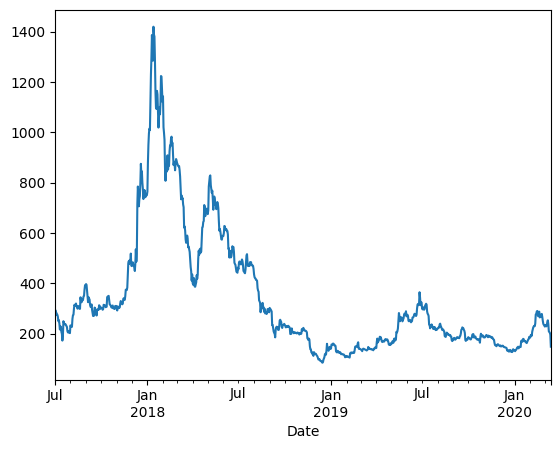

In [114]:
%matplotlib inline
highs.plot()

In [147]:
resample = crypto_frame.drop(columns=["Symbol"]).resample('W')
resample.mean() # this will apply mean on all columns, What if we want to apply different method or aggregate functions on different columns?


resample.agg({"High":"max", "Low":"min", "Close":"mean", "Volume":"sum"})




,High,Low,Close,Volume
Date,,,,
2017-07-02,293.73,253.23,268.202162,8.084631e+07
2017-07-09,285.00,231.25,261.062083,2.246746e+08
2017-07-16,240.33,130.26,195.698393,5.017750e+08
2017-07-23,249.40,153.25,212.783750,7.221637e+08
2017-07-30,229.99,178.03,203.309524,2.657305e+08
2017-08-06,273.00,190.78,225.313274,3.358722e+08
2017-08-13,319.70,257.10,294.084167,4.574880e+08
2017-08-20,309.41,267.00,295.947560,2.432700e+08
2017-08-27,348.20,292.00,324.307679,3.095004e+08
